In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **Which decades produced the most highly rated movies on average, and why might that be?**</font>
</a>

In [ ]:
# Read the CSV file
file_path = r"C:\Users\carla\OneDrive - NOVAIMS\Big Data Foundations\Project\14.csv"
df_14 = pd.read_csv(file_path)

# Display basic info about the data
print("Data shape:", df_14.shape)
print("\nFirst few rows:")
print(df_14.head())
print("\nColumn names:")
print(df_14.columns.tolist())

# Clean column names if needed (remove extra spaces, etc.)
df_14.columns = df_14.columns.str.strip()

# Check the data
print("\nData types:")
print(df_14.dtypes)

Data shape: (6, 4)

First few rows:
  decade  avg_decade_rating  num_movies  total_ratings
0  1960s               3.09        4048         883957
1  1950s               3.07        3244         599233
2  1940s               3.02        6100         651284
3  1970s               3.01        5539        1540407
4  1990s               3.00       14004       14515314

Column names:
['decade', 'avg_decade_rating', 'num_movies', 'total_ratings']

Data types:
decade                object
avg_decade_rating    float64
num_movies             int64
total_ratings          int64
dtype: object


C:\Users\carla\AppData\Local\Temp\ipykernel_1704\1078723777.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)  # Increased padding


Graph saved to: C:\Users\carla\Downloads\average_ratings_by_decade.png


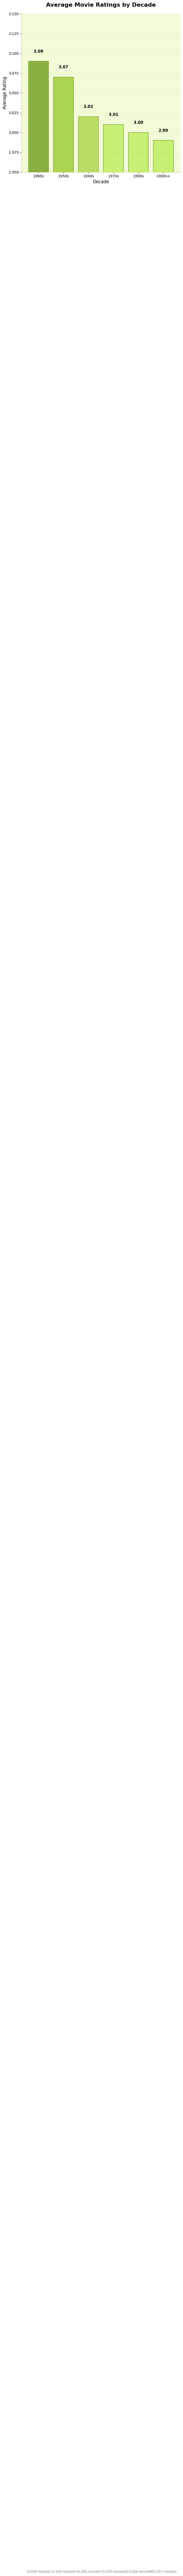

In [ ]:
import os
import matplotlib.pyplot as plt

# Extended green color palette
verde_base = "#C4EE67"
verde_claro = "#E9F9C2"
verde_escuro = "#A4D042"
verde_medio = "#B6D95A"
verde_muito_escuro = "#7FA832"
verde_pastel = "#F0FBD6"

plt.figure(figsize=(8, 8))

# Create gradient bars based on rating values
colors = []
for rating in df_14['avg_decade_rating']:
    if rating >= 3.08:
        colors.append(verde_muito_escuro)  # Darkest for highest ratings
    elif rating >= 3.05:
        colors.append(verde_escuro)        # Dark for high ratings
    elif rating >= 3.02:
        colors.append(verde_medio)         # Medium for mid ratings
    else:
        colors.append(verde_base)          # Base for lower ratings

# Create bar chart with gradient colors
bars = plt.bar(df_14['decade'], df_14['avg_decade_rating'], 
               color=colors, edgecolor=verde_muito_escuro, linewidth=1.5,
               alpha=0.9)

# Customize the chart
plt.title('Average Movie Ratings by Decade', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Add value labels on top of bars
for i, (rating, movies) in enumerate(zip(df_14['avg_decade_rating'], df_14['num_movies'])):
    plt.text(i, rating + 0.01, f'{rating:.2f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Add number of movies below the x-axis
    plt.text(i, -0.08, f'({movies:,} movies)', 
             ha='center', va='top', fontsize=9, color='gray')

# Adjust y-axis to show the small differences better
plt.ylim(2.95, 3.15)

# Customize grid and spines with light green
plt.grid(axis='y', alpha=0.2, linestyle='--', color=verde_medio)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(verde_medio)
plt.gca().spines['bottom'].set_color(verde_medio)

# Set background color
plt.gca().set_facecolor(verde_pastel)

# Adjust layout to ensure everything fits properly
plt.tight_layout(pad=2.0)  # Increased padding

# Export to Downloads folder - removed bbox_inches='tight' and adjusted DPI
downloads_path = r"C:\Users\carla\Downloads\average_ratings_by_decade.png"
plt.savefig(downloads_path, dpi=150, facecolor=verde_pastel)  # Lower DPI for better size control
print(f"Graph saved to: {downloads_path}")
plt.show()

In [ ]:
# Create a styled table matching the plot's color scheme
import pandas as pd

# Apply the same green styling to the dataframe
styled_df = df_14.style\
    .set_caption('Average Movie Ratings by Decade')\
    .set_table_styles([
        {'selector': 'caption', 
         'props': [('font-size', '16px'), 
                   ('font-weight', 'bold'),
                   ('padding', '10px'),
                   ('text-align', 'center')]},
        {'selector': 'thead th', 
         'props': [('background-color', verde_escuro),
                   ('color', 'white'),
                   ('font-weight', 'bold'),
                   ('padding', '8px'),
                   ('border', '1px solid white')]},
        {'selector': 'tbody tr:nth-child(1)', 
         'props': [('background-color', verde_muito_escuro),
                   ('color', 'white'),
                   ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(2)', 
         'props': [('background-color', verde_escuro)]},
        {'selector': 'tbody tr:nth-child(3)', 
         'props': [('background-color', verde_medio)]},
        {'selector': 'tbody tr:nth-child(4)', 
         'props': [('background-color', verde_base)]},
        {'selector': 'tbody tr:nth-child(5)', 
         'props': [('background-color', verde_claro)]},
        {'selector': 'td', 
         'props': [('padding', '6px'),
                   ('border', '1px solid #ddd'),
                   ('text-align', 'center')]},
        {'selector': '', 
         'props': [('border-collapse', 'collapse')]}
    ])\
    .format({
        'avg_decade_rating': '{:.2f}',
        'num_movies': '{:,}',
        'total_ratings': '{:,}'
    })\
    .hide(axis='index')

# Display the styled table
styled_df



decade,avg_decade_rating,num_movies,total_ratings
1960s,3.09,"4,048","883,957"
1950s,3.07,"3,244","599,233"
1940s,3.02,"6,100","651,284"
1970s,3.01,"5,539","1,540,407"
1990s,3.00,"14,004","14,515,314"
2000s+,2.99,"50,703","13,772,814"


<a class="anchor" id='import'>
<font color = '#006400'>
    
# **Which directors or franchises consistently achieve higher average ratings or show less variability?**</font>
</a>

In [ ]:
# Read the CSV file
file_path = r"C:\Users\carla\OneDrive - NOVAIMS\Big Data Foundations\Project\15.csv"
df_15 = pd.read_csv(file_path)

# Display basic info about the data
print("Data shape:", df_15.shape)
print("\nFirst few rows:")
print(df_15.head())
print("\nColumn names:")
print(df_15.columns.tolist())

# Clean column names if needed (remove extra spaces, etc.)
df_15.columns = df_15.columns.str.strip()

# Check the data
print("\nData types:")
print(df_15.dtypes)

Data shape: (61, 15)

First few rows:
            franchise  num_movies  year_span  first_year  last_year  \
0           toy story           4          4      1995.0     2019.0   
1       kung fu panda           3          3      2008.0     2016.0   
2  ghost in the shell           4          4      1995.0     2017.0   
3              ip man           4          4      2008.0     2019.0   
4             persona           5          5      1966.0     2016.0   

   title_variation  avg_rating  avg_stddev  total_ratings  min_rating  \
0              1.0       3.782       0.952         124809        3.59   
1              1.0       3.549       1.009          24054        3.50   
2              1.0       3.757       0.938          16705        3.21   
3              1.0       3.675       0.886           6954        3.36   
4              1.0       3.792       0.659           2708        3.25   

   max_rating  rating_range  consistency_ratio  \
0        3.90          0.31               3.97

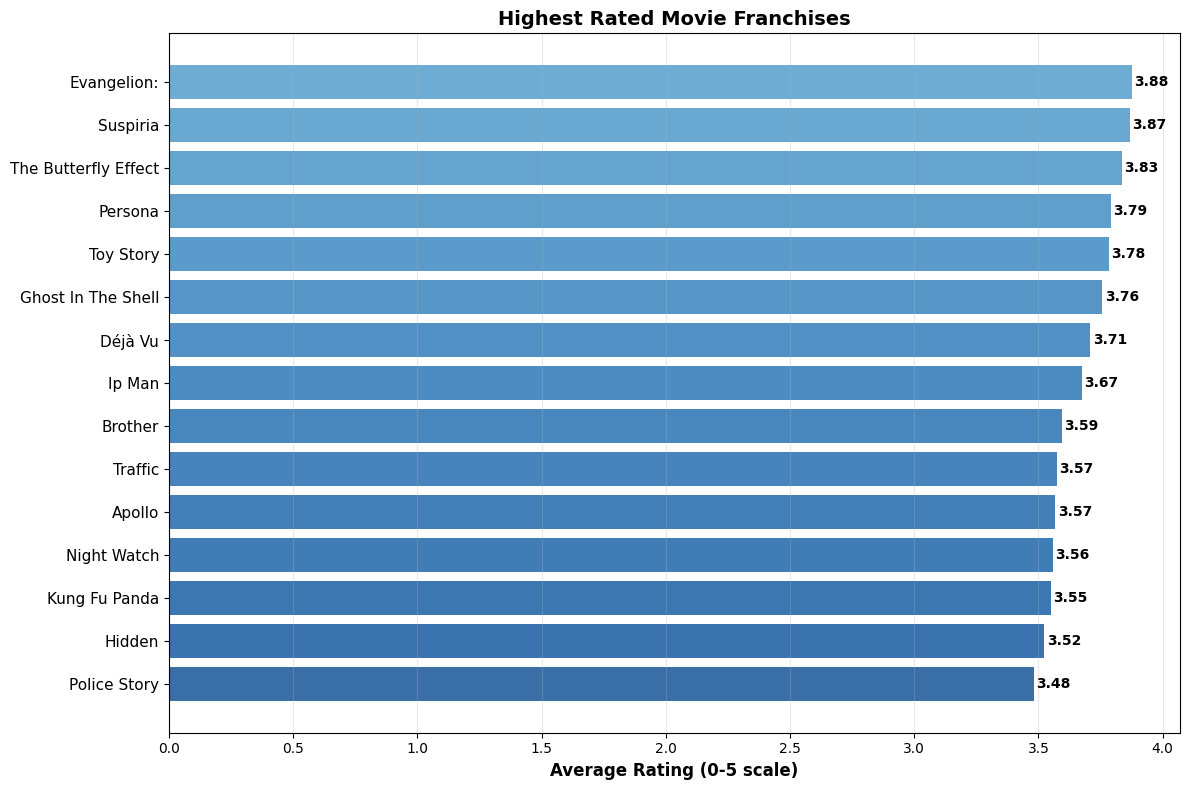

In [ ]:
# Sort by average rating (most important metric for the question)
top_rated = df_15.nlargest(15, 'avg_rating')

plt.figure(figsize=(12, 8))

# Simple blue color scheme
colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(top_rated)))

bars = plt.barh(range(len(top_rated)), top_rated['avg_rating'], 
                color=colors, alpha=0.8)

plt.yticks(range(len(top_rated)), top_rated['franchise'].str.title(), fontsize=11)
plt.xlabel('Average Rating (0-5 scale)', fontsize=12, fontweight='bold')
plt.title('Highest Rated Movie Franchises', fontsize=14, fontweight='bold')

# Add only the rating values
for i, (bar, rating) in enumerate(zip(bars, top_rated['avg_rating'])):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{rating:.2f}', va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()  # Highest rating at top
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

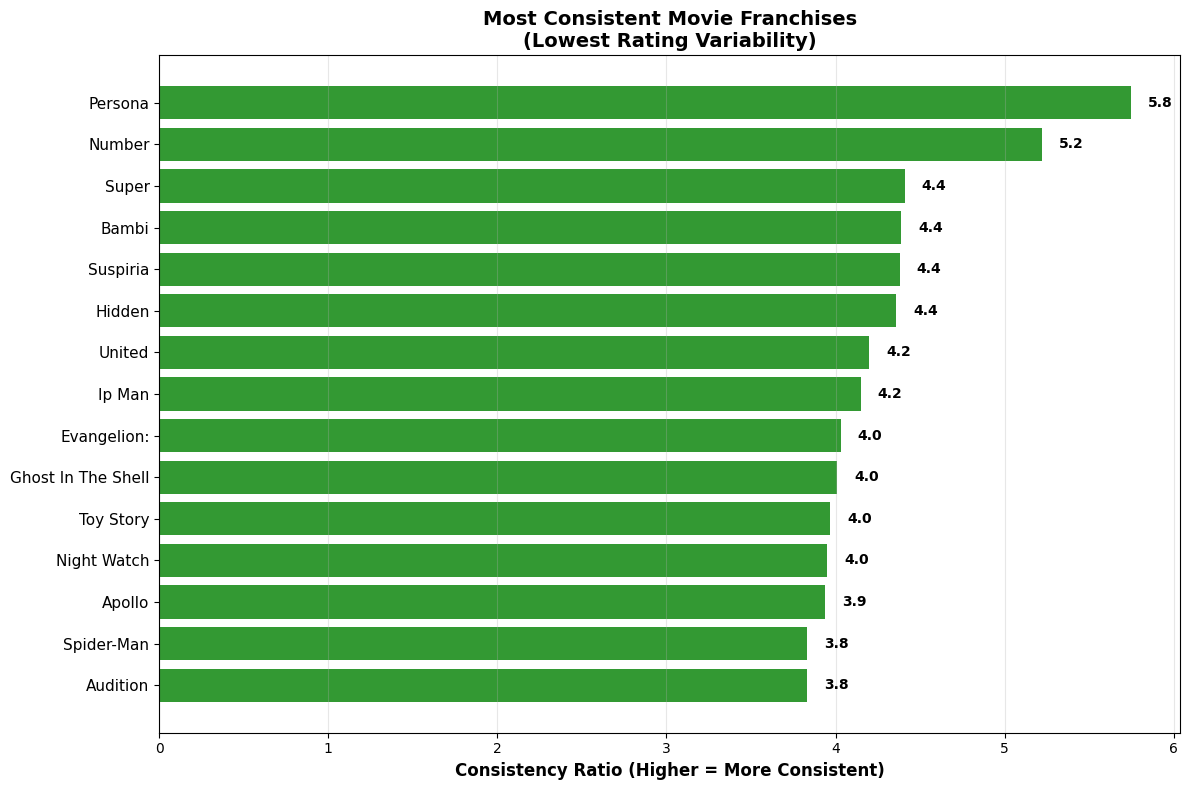

In [ ]:
# Graph 2: Most Consistent (ordered by consistency ratio)
most_consistent = df_15.nlargest(15, 'consistency_ratio')  # Higher ratio = more consistent

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(most_consistent)), most_consistent['consistency_ratio'], 
                color='green', alpha=0.8)

plt.yticks(range(len(most_consistent)), most_consistent['franchise'].str.title(), fontsize=11)
plt.xlabel('Consistency Ratio (Higher = More Consistent)', fontsize=12, fontweight='bold')
plt.title('Most Consistent Movie Franchises\n(Lowest Rating Variability)', fontsize=14, fontweight='bold')

for i, (bar, consistency) in enumerate(zip(bars, most_consistent['consistency_ratio'])):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{consistency:.1f}', va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()  # Highest consistency at top
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Franchises that are both highly rated AND consistent
best_balanced = df_16.nlargest(15, 'consistency_ratio')

plt.figure(figsize=(12, 8))

# Create positions for side-by-side bars
y_pos = range(len(best_balanced))
width = 0.35

bars1 = plt.barh([y - width/2 for y in y_pos], best_balanced['avg_rating'], 
                 width, label='Avg Rating', color='steelblue', alpha=0.8)
bars2 = plt.barh([y + width/2 for y in y_pos], best_balanced['consistency_ratio'], 
                 width, label='Consistency Ratio', color='green', alpha=0.8)

plt.yticks(y_pos, best_balanced['franchise'].str.title(), fontsize=11)
plt.xlabel('Scores', fontsize=12, fontweight='bold')
plt.title('Most Consistent Franchises (Ordered by Consistency)', fontsize=14, fontweight='bold')
plt.legend()

# Add values to bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}', va='center', fontsize=9, fontweight='bold')

plt.gca().invert_yaxis()  # Highest at top
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'df_16' is not defined

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **Is there a relationship between a film’s popularity (number of ratings) and its average score - do popular movies tend to be better or just more visible?**</font>
</a>

In [ ]:
# Read the CSV file
file_path = r"C:\Users\carla\OneDrive - NOVAIMS\Big Data Foundations\Project\16.1.csv"
df_16 = pd.read_csv(file_path)

# Display basic info about the data
print("Data shape:", df_16.shape)
print("\nFirst few rows:")
print(df_16.head())
print("\nColumn names:")
print(df_16.columns.tolist())

# Clean column names if needed (remove extra spaces, etc.)
df_16.columns = df_16.columns.str.strip()

# Check the data
print("\nData types:")
print(df_16.dtypes)

Data shape: (84432, 4)

First few rows:
   movieId                      title  num_ratings  avg_rating
0      318  Shawshank Redemption, The       102929    4.404614
1      356               Forrest Gump       100296    4.052744
2      296               Pulp Fiction        98409    4.196969
3     2571                Matrix, The        93808    4.156437
4      593  Silence of the Lambs, The        90330    4.148367

Column names:
['movieId', 'title', 'num_ratings', 'avg_rating']

Data types:
movieId          int64
title           object
num_ratings      int64
avg_rating     float64
dtype: object
